# Ciclo diesel real 

## **Teoría Relacionada con el Ciclo Diesel**

El **Ciclo Diesel** es un ciclo termodinámico que describe el funcionamiento de los motores Diesel. Es un ciclo de compresión-encendido por compresión, a diferencia del ciclo Otto utilizado en los motores de gasolina, que se basa en el encendido por chispa. A continuación, repasamos los principales aspectos teóricos del ciclo Diesel que hemos tocado:

### 1. **Fases del Ciclo Diesel:**
   - **Admisión (Fase 1)**: Se introduce la mezcla de aire en el cilindro a presión atmosférica, lo que implica una expansión a presión constante.
   - **Compresión (Fase 2)**: El aire es comprimido adiabáticamente, lo que aumenta tanto la presión como la temperatura. Este es un proceso muy importante porque aumenta la eficiencia del ciclo a mayor compresión. La relación de compresión en los motores Diesel es mayor que en los motores Otto, lo que contribuye a una mayor eficiencia térmica.
   - **Combustión (Fase 3)**: La inyección de combustible ocurre a una presión elevada, lo que provoca la ignición espontánea debido a la alta temperatura generada por la compresión. Este es un proceso que no involucra una chispa, sino que depende únicamente de la temperatura alcanzada por la compresión.
   - **Expansión (Fase 4)**: Los gases resultantes de la combustión se expanden, realizando trabajo sobre el pistón. Esta expansión se realiza a través de un proceso isobarico hasta que se transmita todo el calor y se sigue expandiendo adiabaticamente.
   - **Escape (Fase 5)**: Finalmente, los gases de escape se expulsan a presión atmosférica.

   ![Ciclo Diesel](./imagenes/image.png)

### 2. **Consideraciones de Combustión:**
   - Las **Condiciones iniciales**: tomamos condiciones SATP y basamos los datos en el motor 2.0 TDI de Volkswagen de 115 HP.
   - La **Composicion del aire**: usamos 79% N2 y 21% O2, y masa molar ponderada entre ellos.
   - Las **Condiciones de combustion**: se toma en cuenta el coeficiente AFR que mide la cantidad de diesel inyectado por masa de aire. Se considero el aumento de la masa de la mezcla tras la inyección de diesel, se asumio que el diesel es puramente dodecano C12H26
   y que se combusitiona un 98% del diesel (DCP), se consideran las fracciones molares de cada gas de la mezcla despues de la combustion y el cp ponderado de la nueva mezcla. 
   - **Ecuación de estado** Se modelo todo el ciclo como un gas ideal.
   - **Paredes no adiabaticas** Se tomo en cuenta que las paredes del cilindro no son adiabaticas y se calcula el calor perdido en el ciclo por conduccion a las paredes.
   

### 3. **Simulación con la Función Diesel:**
   - El código que implementamos simula estos procesos termodinámicos con los siguientes paramteros
    Los valores default son los de un motor 2.0 TDI de Volkswagen.
    
    V_cilindro: volumen del cilindro del motor
    P_atm: presión atmosférica
    T_ext: temperatura exterior
    rc: relacion de compresion, V_Max/V_min
    k: coeficiente de transferencia de calor, (W/m^2K)
    AFR: air fuel ratio, aire/combustible
    DCP: porcentaje de combustion de diesel
    delta_t: intervalo de tiempo explosion, o expansion isobarica
    gamma: factor adiabatico para gas ideal
    cp: calor específico para el aire, J/(kg·K)
    cv: calor específico para el combustible, J/(kg·K)
    s_0: entropia molar estandar para el estado inicial J/mol K
    anim: si se quiere animar el ciclo
    PV: diagrama PV
    TV: diagrama TV
    TS: diagrama TS
    PVT:diagrama PVT

---

Este es un estudio para un ciclo diesel real, donde nos basamos en el motor 2.0 TDI de Volkswagen, pero se puede extrapolar para otros motores.
La libreria Thermal_process es creada por Victor Bernal y Oliver lira para simular ciclos termodinamicos.

In [1]:
import thermal_process as tp
import matplotlib.pyplot as plt
import numpy as np

Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -592.85J


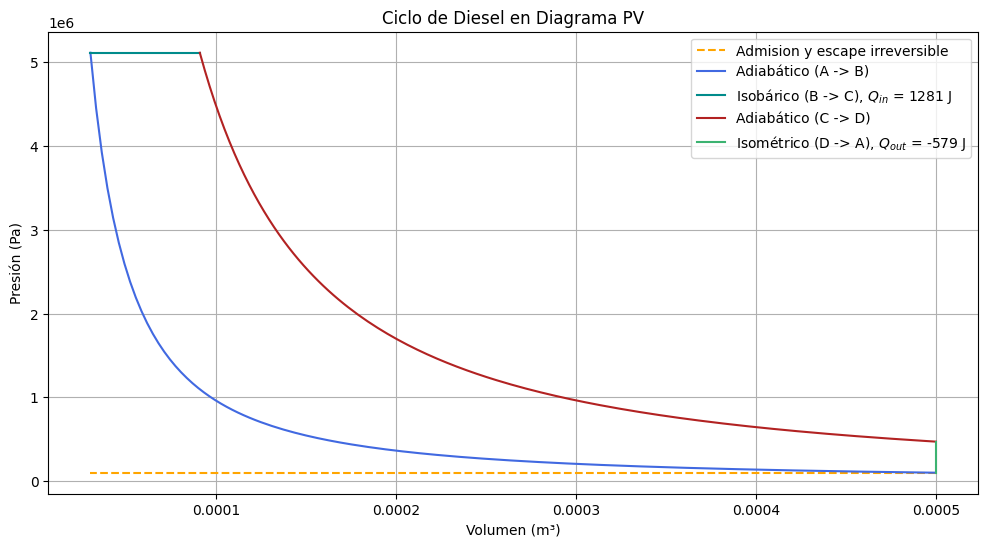

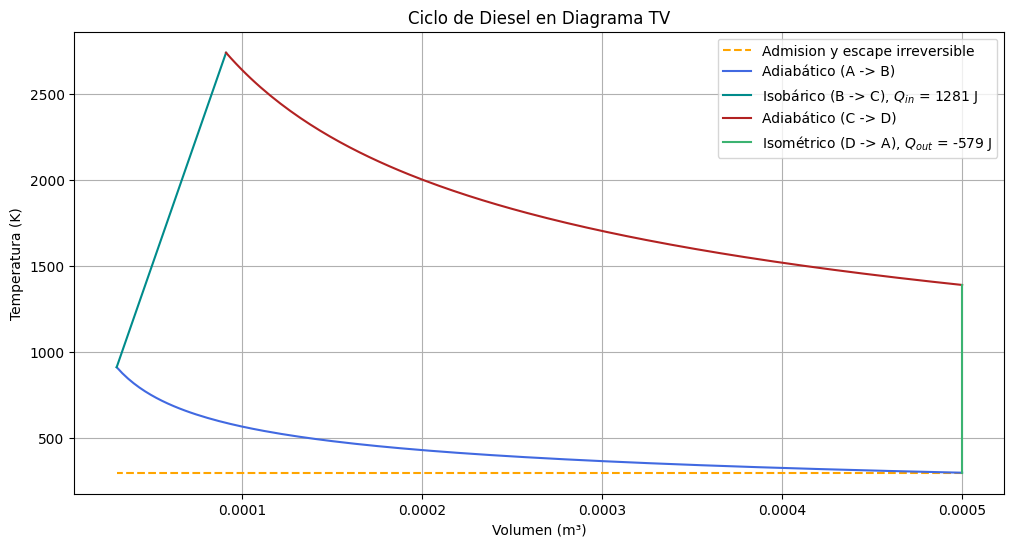

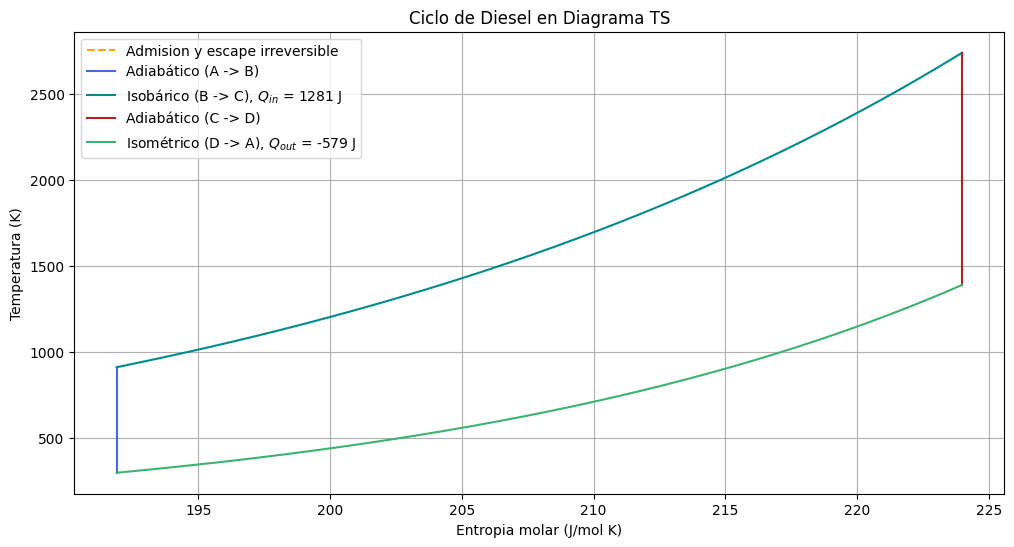

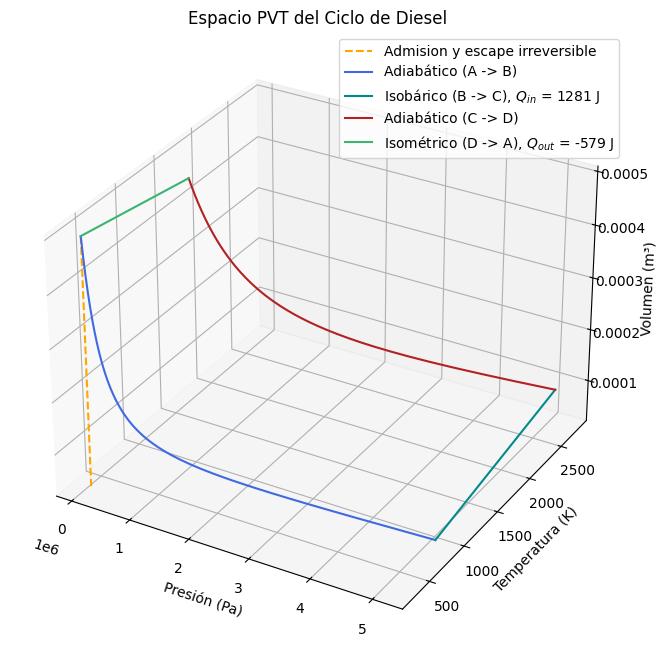

[np.float64(50.5823911161565), np.float64(-592.8544326081151)]

In [2]:
tp.diesel()

## Análisis de la relación entre le factor de compresión y trabajo y eficiencia

In [3]:
Rc = np.zeros((100,1))
ef_worr_matrix = np.zeros((100,2))
for i in range(100):
    Rc[i][0] = i+4 
    ef_worr_matrix[i] = tp.diesel(rc =Rc[i][0],PV = False,TV = False,TS = False,PVT = False)

Porcentaje eficiencia: -42.10%
Trabajo en el cilindro: 340.67J
Porcentaje eficiencia: -13.11%
Trabajo en el cilindro: 119.43J
Porcentaje eficiencia: 3.50%
Trabajo en el cilindro: -34.12J
Porcentaje eficiencia: 14.48%
Trabajo en el cilindro: -148.01J
Porcentaje eficiencia: 22.40%
Trabajo en el cilindro: -236.48J
Porcentaje eficiencia: 28.44%
Trabajo en el cilindro: -307.57J
Porcentaje eficiencia: 33.24%
Trabajo en el cilindro: -366.22J
Porcentaje eficiencia: 37.17%
Trabajo en el cilindro: -415.61J
Porcentaje eficiencia: 40.45%
Trabajo en el cilindro: -457.90J
Porcentaje eficiencia: 43.26%
Trabajo en el cilindro: -494.61J
Porcentaje eficiencia: 45.69%
Trabajo en el cilindro: -526.86J
Porcentaje eficiencia: 47.82%
Trabajo en el cilindro: -555.46J
Porcentaje eficiencia: 49.71%
Trabajo en el cilindro: -581.04J
Porcentaje eficiencia: 51.40%
Trabajo en el cilindro: -604.09J
Porcentaje eficiencia: 52.93%
Trabajo en el cilindro: -625.00J
Porcentaje eficiencia: 54.31%
Trabajo en el cilindro: -64

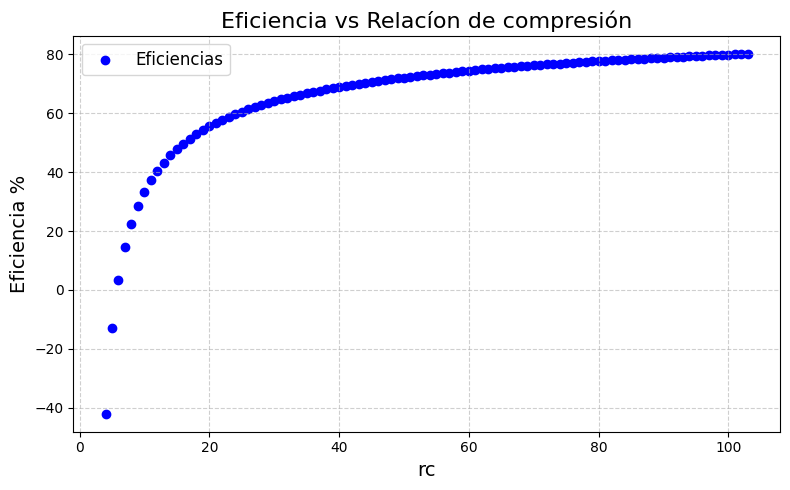

In [4]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(Rc[:,0], ef_worr_matrix[:,0], label='Eficiencias', color='blue')

ax.set_title("Eficiencia vs Relacíon de compresión", fontsize=16)
ax.set_xlabel("rc", fontsize=14)
ax.set_ylabel("Eficiencia %", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  
ax.legend(fontsize=12) 

plt.tight_layout()
plt.show()

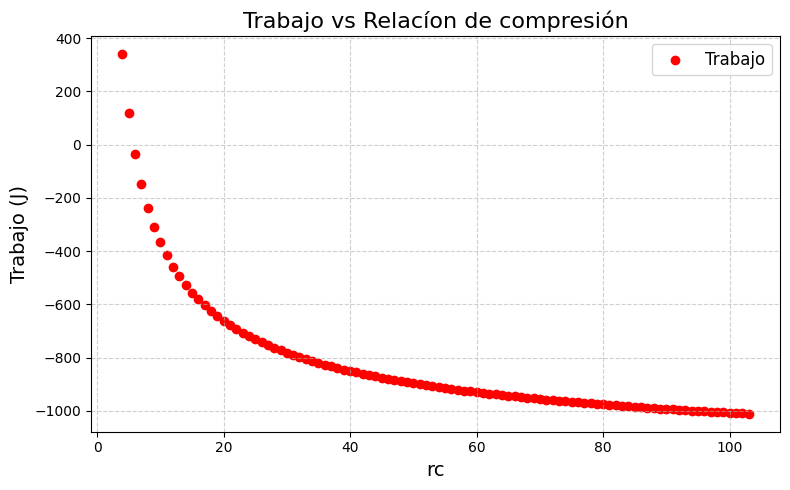

In [5]:

fig, ax = plt.subplots(figsize=(8, 5))  


ax.scatter(Rc[:,0], ef_worr_matrix[:,1], label='Trabajo', color='red')

# Personalización
ax.set_title("Trabajo vs Relacíon de compresión", fontsize=16)
ax.set_xlabel("rc", fontsize=14)
ax.set_ylabel("Trabajo (J)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  
ax.legend(fontsize=12)  

plt.tight_layout()
plt.show()

### Limitaciones  :
Aunque una mayor relación de compresión mejora la eficiencia térmica, tiene límites prácticos y técnicos:

#### Detonación
 (o "knocking"): En motores de gasolina, una relación de compresión muy alta puede hacer que el combustible se autoencienda prematuramente, dañando el motor. Esto se mitiga con combustibles de mayor octanaje o usando tecnologías como inyección directa.
#### Materiales y diseño:
Las altas relaciones de compresión generan más calor y presión, lo que requiere materiales más resistentes y diseños de motor avanzados.
Motores diésel: Los motores diésel tienen una relación de compresión naturalmente alta y no enfrentan problemas de detonación, lo que contribuye a su alta eficiencia.

## Análisis de el porcentaje de combustion

In [6]:
dcp = np.zeros((100,1))
ef_worr_matrix = np.zeros((100,2))
for i in range(100):
    dcp[i][0] = (i+4)/100
    ef_worr_matrix[i] = tp.diesel(DCP= dcp[i][0],PV = False,TV = False,TS = False,PVT = False)

Porcentaje eficiencia: 64.31%
Trabajo en el cilindro: -33.16J
Porcentaje eficiencia: 64.15%
Trabajo en el cilindro: -41.34J
Porcentaje eficiencia: 64.00%
Trabajo en el cilindro: -49.47J
Porcentaje eficiencia: 63.85%
Trabajo en el cilindro: -57.55J
Porcentaje eficiencia: 63.70%
Trabajo en el cilindro: -65.58J
Porcentaje eficiencia: 63.55%
Trabajo en el cilindro: -73.57J
Porcentaje eficiencia: 63.39%
Trabajo en el cilindro: -81.52J
Porcentaje eficiencia: 63.24%
Trabajo en el cilindro: -89.41J
Porcentaje eficiencia: 63.10%
Trabajo en el cilindro: -97.26J
Porcentaje eficiencia: 62.95%
Trabajo en el cilindro: -105.07J
Porcentaje eficiencia: 62.80%
Trabajo en el cilindro: -112.83J
Porcentaje eficiencia: 62.65%
Trabajo en el cilindro: -120.54J
Porcentaje eficiencia: 62.50%
Trabajo en el cilindro: -128.21J
Porcentaje eficiencia: 62.35%
Trabajo en el cilindro: -135.83J
Porcentaje eficiencia: 62.21%
Trabajo en el cilindro: -143.41J
Porcentaje eficiencia: 62.06%
Trabajo en el cilindro: -150.94J
P

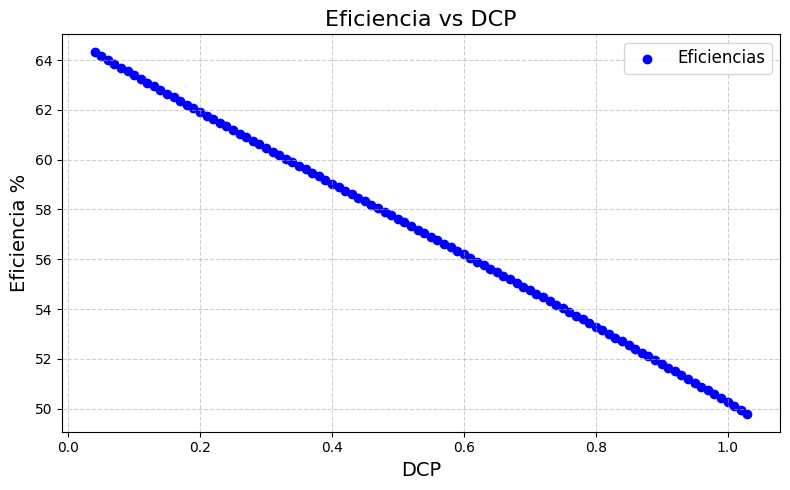

In [7]:

fig, ax = plt.subplots(figsize=(8, 5))  


ax.scatter(dcp[:,0], ef_worr_matrix[:,0], label='Eficiencias', color='blue')


ax.set_title("Eficiencia vs DCP", fontsize=16)
ax.set_xlabel("DCP", fontsize=14)
ax.set_ylabel("Eficiencia %", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  

# Mostrar la gráfica
plt.tight_layout()
plt.show()

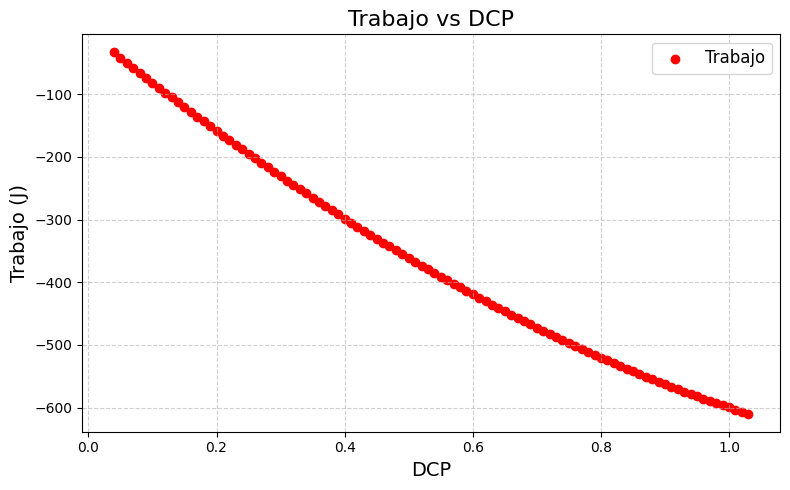

In [8]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(dcp[:,0], ef_worr_matrix[:,1], label='Trabajo', color='red')


ax.set_title("Trabajo vs DCP", fontsize=16)
ax.set_xlabel("DCP", fontsize=14)
ax.set_ylabel("Trabajo (J)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

En un sistema ideal, un aumento en el DCP podría, en ciertos casos, disminuir la eficiencia térmica debido a efectos como mayores pérdidas por transferencia de calor o gases de escape. Sin embargo, el trabajo neto generado por el ciclo probablemente aumentaría debido a la mayor cantidad de energía liberada durante la combustión. Este es un escenario más teórico que práctico, ya que en motores reales un DCP alto tiende a mejorar tanto la eficiencia como el trabajo hasta un límite razonable.

## Análisis de eficiencia-trabajo con respecto al volumen del cilindro

In [9]:
Vc = np.zeros((100,1))
ef_worr_matrix = np.zeros((100,2))
for i in range(100):
    Vc[i][0] = (i+1)*10**(-4)
    ef_worr_matrix[i] = tp.diesel(V_cilindro= Vc[i][0],PV = False,TV = False,TS = False,PVT = False)

Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -118.57J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -237.14J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -355.71J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -474.28J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -592.85J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -711.43J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -830.00J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -948.57J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1067.14J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1185.71J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1304.28J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1422.85J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1541.42J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1659.99J
Porcentaje eficiencia: 50.58%
Trabajo en el cilindro: -1778.56J
Porcentaje eficiencia: 50.58%
Trabajo en el cili

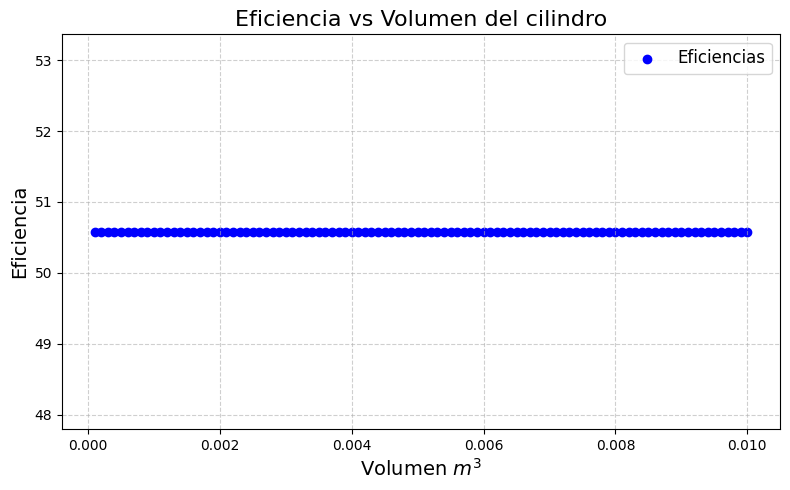

In [10]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(Vc[:,0], ef_worr_matrix[:,0], label='Eficiencias', color='blue')


ax.set_title("Eficiencia vs Volumen del cilindro", fontsize=16)
ax.set_xlabel(rf"Volumen $m^3$", fontsize=14)
ax.set_ylabel("Eficiencia", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

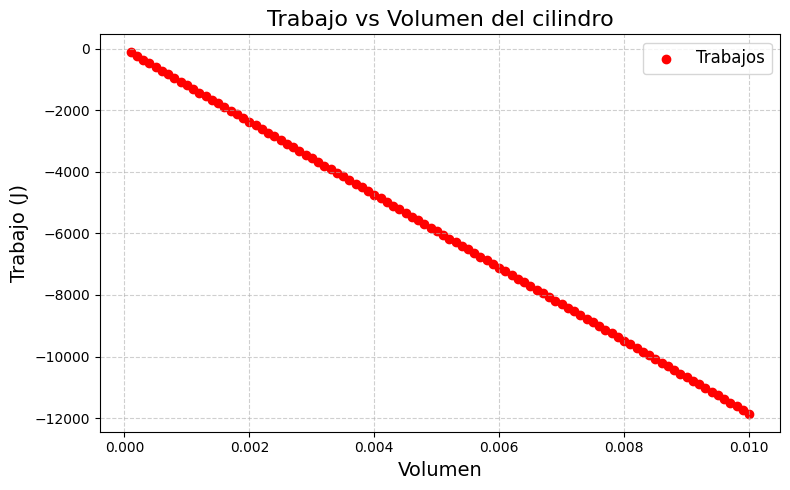

In [11]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(Vc[:,0], ef_worr_matrix[:,1], label='Trabajos', color='red')


ax.set_title("Trabajo vs Volumen del cilindro", fontsize=16)
ax.set_xlabel("Volumen", fontsize=14)
ax.set_ylabel("Trabajo (J)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

Efectos en la eficiencia térmica:

Aumentar el volumen del cilindro no necesariamente mejora la eficiencia térmica. La eficiencia depende más de la relación de compresión y las pérdidas térmicas que del tamaño del cilindro.
Limites físicos:

Cilindros muy grandes pueden enfrentar problemas de enfriamiento y mayores pérdidas de calor hacia las paredes del cilindro, lo que puede reducir la eficiencia global.
Velocidad del motor:

En motores con cilindros más grandes, la velocidad máxima del motor tiende a ser menor porque las piezas móviles son más pesadas, lo que limita la rapidez con la que pueden moverse sin generar tensiones excesivas.

## Efectos de la presion atmosferica en los motores 

In [12]:
num_points = 100  
pres = np.zeros((num_points, 1))
ef_worr_matrix = np.zeros((num_points, 2))


for j, i in enumerate(range(33700, 108500, 748)):
    pres[j][0] = i  
    ef_worr_matrix[j, :] = tp.diesel(P_atm=pres[j][0], PV=False, TV=False, TS=False, PVT=False)

Porcentaje eficiencia: 39.30%
Trabajo en el cilindro: -124.72J
Porcentaje eficiencia: 39.75%
Trabajo en el cilindro: -129.90J
Porcentaje eficiencia: 40.17%
Trabajo en el cilindro: -135.08J
Porcentaje eficiencia: 40.57%
Trabajo en el cilindro: -140.26J
Porcentaje eficiencia: 40.95%
Trabajo en el cilindro: -145.44J
Porcentaje eficiencia: 41.31%
Trabajo en el cilindro: -150.61J
Porcentaje eficiencia: 41.65%
Trabajo en el cilindro: -155.79J
Porcentaje eficiencia: 41.97%
Trabajo en el cilindro: -160.97J
Porcentaje eficiencia: 42.28%
Trabajo en el cilindro: -166.15J
Porcentaje eficiencia: 42.57%
Trabajo en el cilindro: -171.33J
Porcentaje eficiencia: 42.85%
Trabajo en el cilindro: -176.50J
Porcentaje eficiencia: 43.12%
Trabajo en el cilindro: -181.68J
Porcentaje eficiencia: 43.37%
Trabajo en el cilindro: -186.86J
Porcentaje eficiencia: 43.62%
Trabajo en el cilindro: -192.04J
Porcentaje eficiencia: 43.85%
Trabajo en el cilindro: -197.22J
Porcentaje eficiencia: 44.08%
Trabajo en el cilindro: -

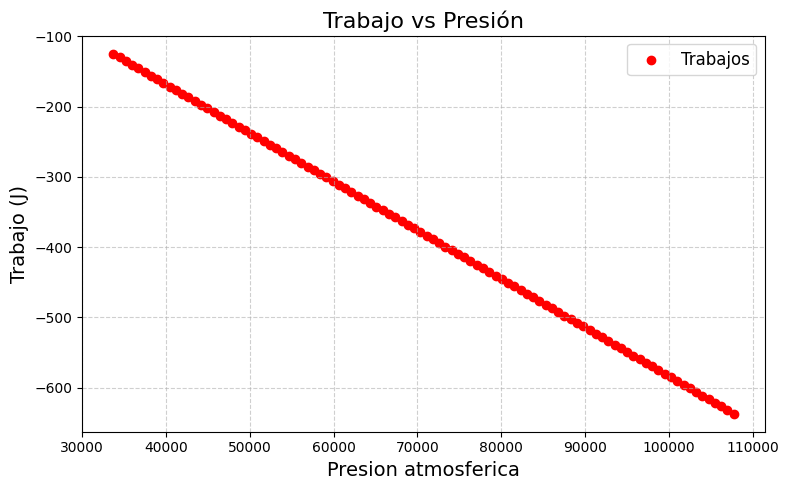

In [13]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(pres[:,0], ef_worr_matrix[:,1], label='Trabajos', color='red')


ax.set_title("Trabajo vs Presión", fontsize=16)
ax.set_xlabel("Presion atmosferica", fontsize=14)
ax.set_ylabel("Trabajo (J)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

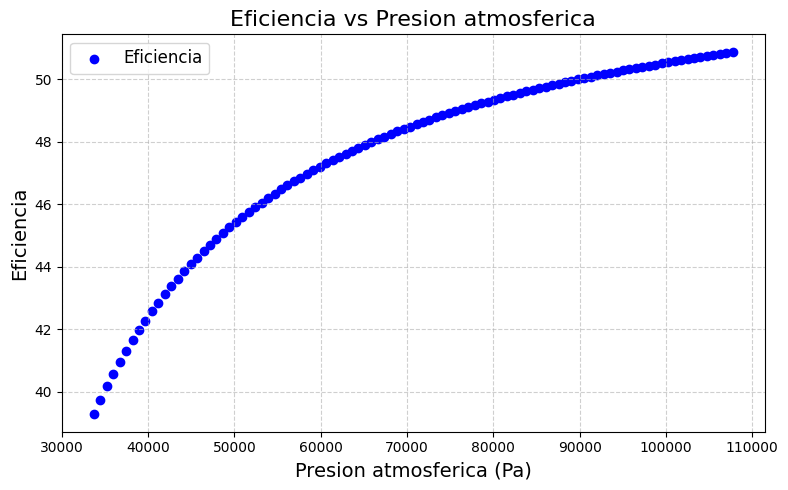

In [14]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(pres[:,0], ef_worr_matrix[:,0], label='Eficiencia', color='blue')


ax.set_title("Eficiencia vs Presion atmosferica", fontsize=16)
ax.set_xlabel("Presion atmosferica (Pa)", fontsize=14)
ax.set_ylabel("Eficiencia", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

1. En lugares con alta presión atmosférica:
Mayor densidad de aire: Con una mayor presión atmosférica, el aire es más denso, lo que permite que entre una mayor cantidad de oxígeno en el cilindro durante la admisión. Esto favorece una combustión más eficiente.

Mayor cantidad de energía liberada: Debido a que se quema más combustible (gracias a la mayor cantidad de aire disponible), se produce más energía en cada ciclo, lo que aumenta el trabajo neto generado por el motor.

Beneficio para el rendimiento: En altitudes más bajas (donde la presión atmosférica es más alta), los motores tienden a funcionar con un mejor rendimiento debido a la mayor cantidad de oxígeno disponible para la combustión.


2. En lugares con baja presión atmosférica:

Menor densidad de aire: A medida que la altitud aumenta y la presión atmosférica disminuye, el aire se vuelve menos denso. Esto significa que entra menos oxígeno en el cilindro durante la admisión, lo que reduce la cantidad de combustible que se puede quemar completamente en cada ciclo.


Menos energía disponible: Con menos oxígeno disponible, la combustión será menos eficiente, lo que reduce la energía liberada y, por lo tanto, el trabajo neto producido por el motor. Esto se traduce en una pérdida de potencia.


Desempeño del motor en altitudes altas: Los motores tienden a perder potencia en altitudes altas (donde la presión es baja) porque tienen que lidiar con una mezcla aire-combustible más pobre (menos aire para la misma cantidad de combustible).

## Efectos de la temperatura del ambiente

In [15]:
temp_range = np.arange(183.95, 329.85, 1.459)
num_points = len(temp_range)

temp = np.zeros((num_points, 1))
ef_worr_matrix = np.zeros((num_points, 2))

for j, i in enumerate(temp_range):
    temp[j][0] = i
    ef_worr_matrix[j, :] = tp.diesel(T_ext=temp[j][0], PV=False, TV=False, TS=False, PVT=False)

Porcentaje eficiencia: 47.08%
Trabajo en el cilindro: -923.83J
Porcentaje eficiencia: 47.15%
Trabajo en el cilindro: -917.74J
Porcentaje eficiencia: 47.23%
Trabajo en el cilindro: -911.71J
Porcentaje eficiencia: 47.31%
Trabajo en el cilindro: -905.76J
Porcentaje eficiencia: 47.38%
Trabajo en el cilindro: -899.87J
Porcentaje eficiencia: 47.45%
Trabajo en el cilindro: -894.05J
Porcentaje eficiencia: 47.52%
Trabajo en el cilindro: -888.29J
Porcentaje eficiencia: 47.60%
Trabajo en el cilindro: -882.60J
Porcentaje eficiencia: 47.66%
Trabajo en el cilindro: -876.96J
Porcentaje eficiencia: 47.73%
Trabajo en el cilindro: -871.39J
Porcentaje eficiencia: 47.80%
Trabajo en el cilindro: -865.88J
Porcentaje eficiencia: 47.87%
Trabajo en el cilindro: -860.43J
Porcentaje eficiencia: 47.93%
Trabajo en el cilindro: -855.04J
Porcentaje eficiencia: 48.00%
Trabajo en el cilindro: -849.70J
Porcentaje eficiencia: 48.06%
Trabajo en el cilindro: -844.43J
Porcentaje eficiencia: 48.12%
Trabajo en el cilindro: -

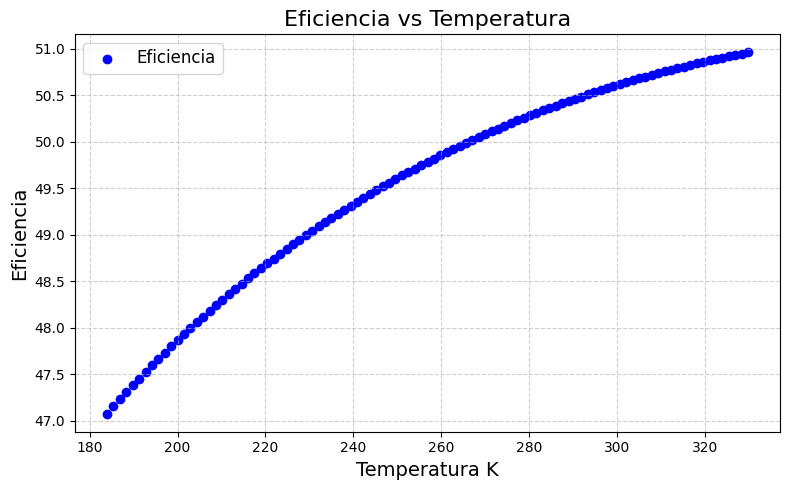

In [16]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(temp[:,0], ef_worr_matrix[:,0], label='Eficiencia', color='blue')


ax.set_title("Eficiencia vs Temperatura", fontsize=16)
ax.set_xlabel("Temperatura K", fontsize=14)
ax.set_ylabel("Eficiencia", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()

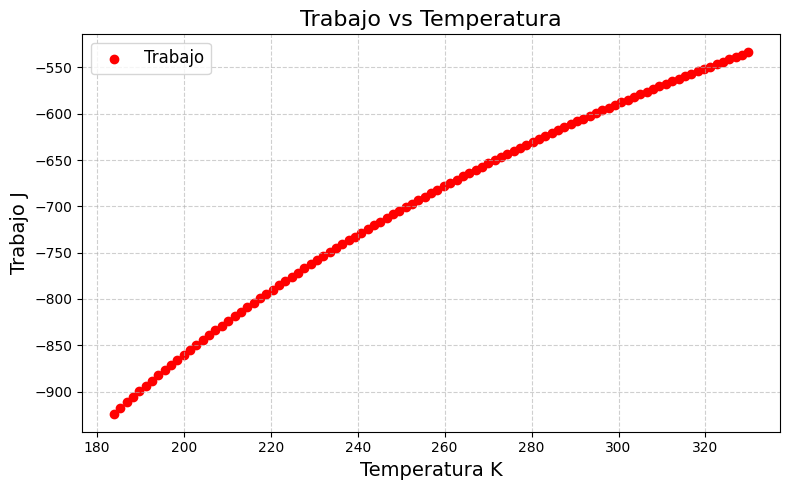

In [17]:

fig, ax = plt.subplots(figsize=(8, 5))  

ax.scatter(temp[:,0], ef_worr_matrix[:,1], label='Trabajo', color='red')


ax.set_title("Trabajo vs Temperatura", fontsize=16)
ax.set_xlabel("Temperatura K", fontsize=14)
ax.set_ylabel("Trabajo J", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6) 
ax.legend(fontsize=12)  


plt.tight_layout()
plt.show()